In [60]:
# =============================
# 🧪 Install Dependencies
# =============================
!pip3 install tensorflow
!pip3 install matplotlib
!pip3 install pillow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [62]:
# =============================
# 📂 Set Directory Paths
# =============================
import os

base_dir = '/Users/pradeep/Downloads/PLD_3_Classes_256'
train_dir = os.path.join(base_dir, 'Training')
val_dir = os.path.join(base_dir, 'Validation')

In [64]:
# =============================
# 🖼️ Import Libraries
# =============================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# =============================
# 🧠 Data Preprocessing
# =============================
img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3251 images belonging to 3 classes.


In [68]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 416 images belonging to 3 classes.


In [70]:
# =============================
# 🧱 Build CNN Model
# =============================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [74]:
# =============================
# 🚂 Train the Model
# =============================
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)



Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.4390 - loss: 1.3614 - val_accuracy: 0.6995 - val_loss: 0.8015
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.6887 - loss: 0.7609 - val_accuracy: 0.7788 - val_loss: 0.5488
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.7955 - loss: 0.4994 - val_accuracy: 0.8486 - val_loss: 0.4124
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8857 - loss: 0.3270 - val_accuracy: 0.8462 - val_loss: 0.3840
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8821 - loss: 0.3326 - val_accuracy: 0.8606 - val_loss: 0.4029
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9177 - loss: 0.2318 - val_accuracy: 0.9038 - val_loss: 0.2929
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9475 - loss: 0.1653 - val_accuracy: 0.8702 - val_loss: 0.3445
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9447 - loss: 0.1570 - val_accuracy: 0.877

In [76]:
# =============================
# 💾 Save the Model
# =============================
model.save("potato_leaf_model_local.h5")

In [78]:
# =============================
# 📊 Plot Accuracy & Loss
# =============================
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

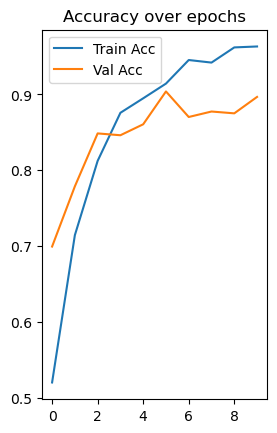

In [80]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy over epochs")
plt.legend()


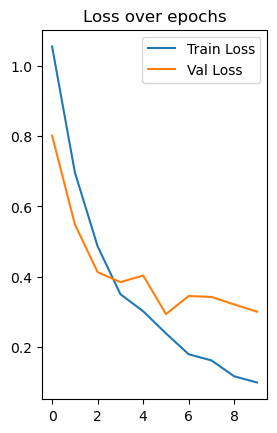

In [82]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over epochs")
plt.legend()


In [84]:
plt.show()

In [86]:
# =============================
# 📂 Predict from Testing Images
# =============================
import os
from tensorflow.keras.preprocessing import image

In [88]:
test_dir = os.path.join(base_dir, 'Testing')
class_labels = list(train_generator.class_indices.keys())

In [90]:
def predict_image_from_path(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    confidence = prediction[0][class_idx]

    print(f"{os.path.basename(img_path)} → {class_labels[class_idx]} ({confidence:.2f} confidence)")


In [92]:
# Example: Run on 5 test images
for root, _, files in os.walk(test_dir):
    for file in files[:5]:  # Change this to predict more
        predict_image_from_path(os.path.join(root, file))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Late_Blight_11.jpg → Late_Blight (1.00 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Late_Blight_39.jpg → Late_Blight (1.00 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Late_Blight_38.jpg → Late_Blight (1.00 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Late_Blight_10.jpg → Late_Blight (0.99 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Late_Blight_12.jpg → Late_Blight (1.00 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Healthy_2.jpg → Healthy (0.77 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Healthy_16.jpg → Early_Blight (0.49 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Healthy_17.jpg → Late_Blight (0.69 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Healthy_3.jpg → Healthy (0.59 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Healthy_1.jpg → Late_Blight (0.76 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Early_Blight_31.jpg → Early_Blight (0.91 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Early_Bligh

Predicting: Late_Blight_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


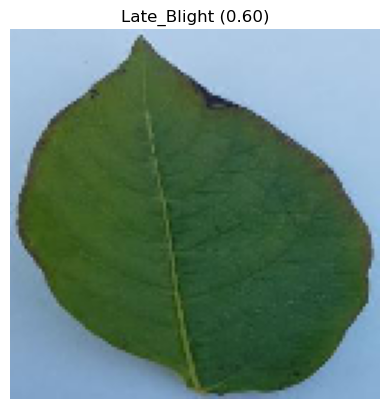

Predicting: Late_Blight_10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


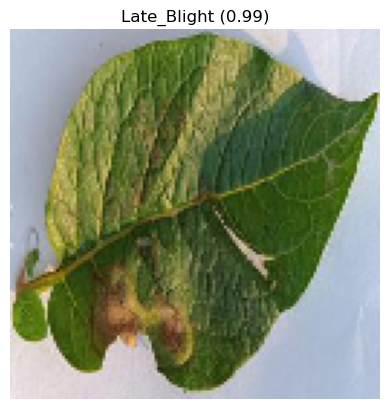

Predicting: Late_Blight_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


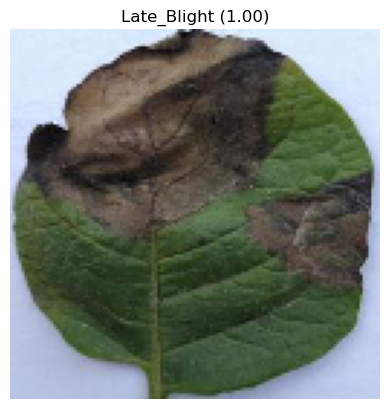

Predicting: Late_Blight_101.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


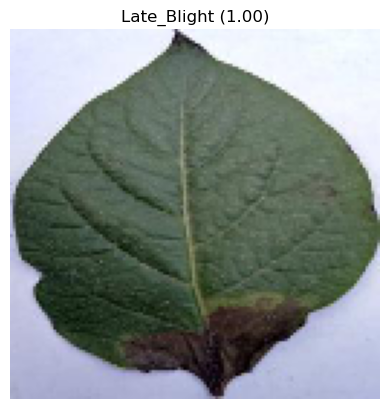

Predicting: Late_Blight_102.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


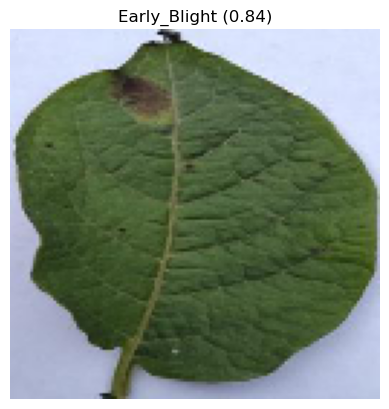

Predicting: Healthy_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


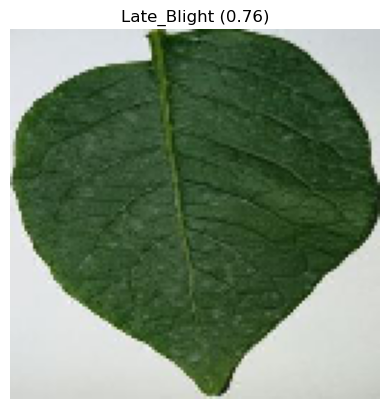

Predicting: Healthy_10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


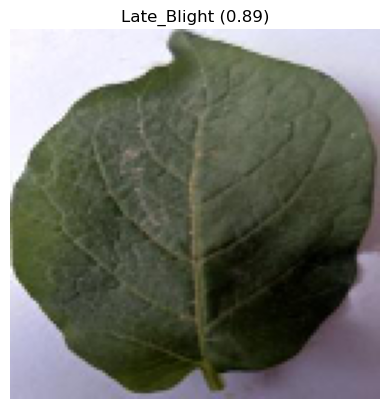

Predicting: Healthy_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


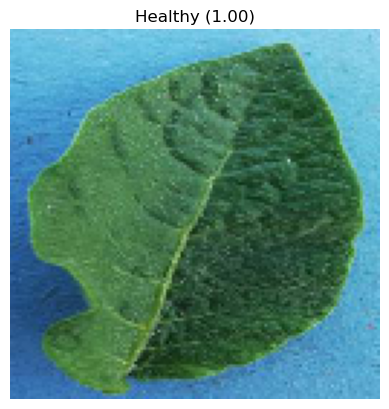

Predicting: Healthy_101.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


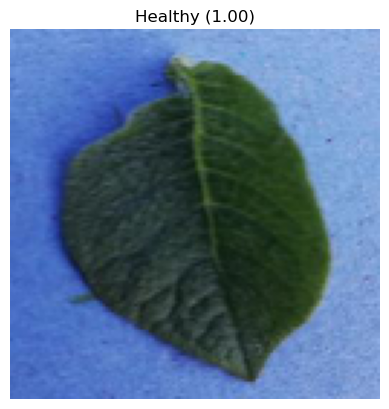

Predicting: Healthy_102.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


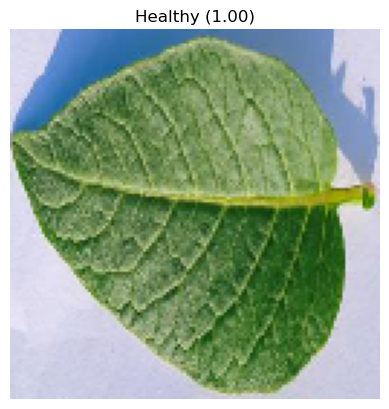

Predicting: Early_Blight_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


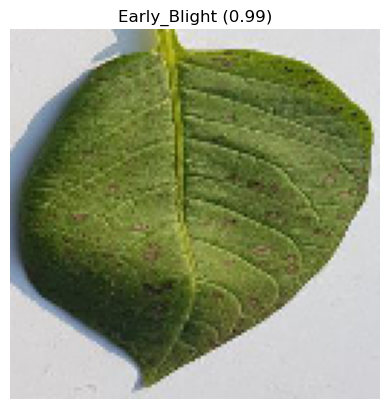

Predicting: Early_Blight_10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


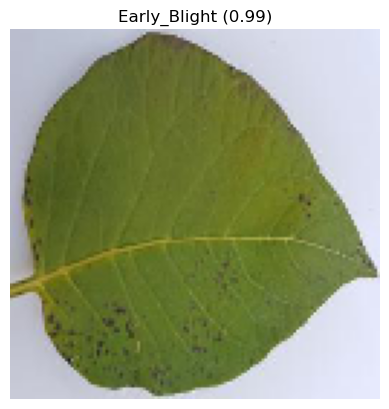

Predicting: Early_Blight_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


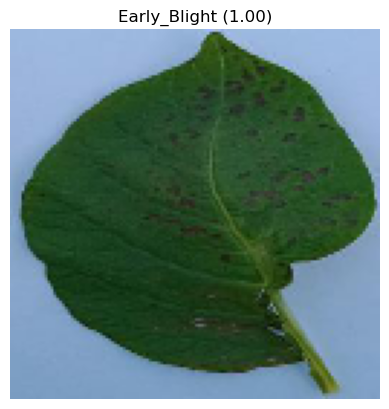

Predicting: Early_Blight_101.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


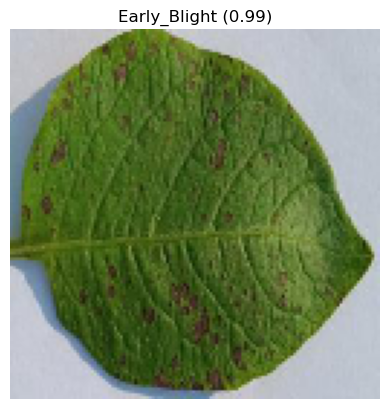

Predicting: Early_Blight_102.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


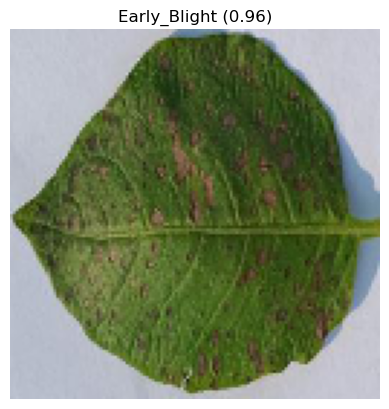

In [94]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

test_dir = os.path.join(base_dir, 'Testing')
class_labels = list(train_generator.class_indices.keys())

def predict_and_display(img_path):
    # Load & preprocess image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    confidence = prediction[0][class_idx]
    predicted_label = class_labels[class_idx]

    # Display image & prediction
    plt.imshow(img)
    plt.title(f"{predicted_label} ({confidence:.2f})")
    plt.axis("off")
    plt.show()

# Example: Predict 5 random images from Testing
for root, _, files in os.walk(test_dir):
    for file in sorted(files)[:5]:  # Change this to more if needed
        full_path = os.path.join(root, file)
        print(f"Predicting: {file}")
        predict_and_display(full_path)
